In [2]:
import sys; sys.path.append("..")
from trader.data.binance import Binance
import pandas as pd
import numpy as np

In [3]:
b = Binance()

In [33]:
bars = b.get_bars(["BTCUSDT", "ETHUSDT", "ADAUSDT"], pd.to_datetime("2022-04-01"), pd.to_datetime("2022-06-15"), "1d", "SPOT")

In [34]:
prices = bars.pivot(index="CloseTime", columns = "Symbol", values="Close")
#volumes = bars.pivot(index="CloseTime", columns = "Symbol", values="QuoteVolume")

## Steps for backtest
    1. Get forecast
    2. Get price vol
    3. Set vol target
    4. Get cash <-- make into time series
    5. Position size = volatility scalar * forecast / long run average foreacast (should be around 10)
    6. Vol scalar = cash vol target / instrument value vol (in same currency)<
    

In [37]:
signal = prices.rolling(10).mean() - prices.rolling(5).mean()
signal /= prices.diff().ewm(35).std()

<AxesSubplot:xlabel='CloseTime'>

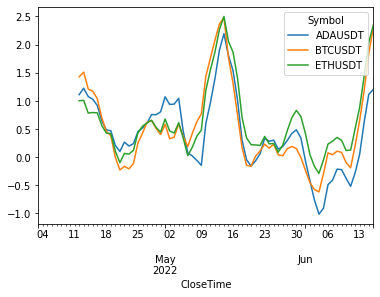

In [38]:
signal.plot()